### Load Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analytics-um/train.csv
/kaggle/input/analytics-um/test (4).csv


### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings

warnings.filterwarnings('ignore')


### Load Dataset

In [4]:
try:
    df_train = pd.read_csv('/kaggle/input/analytics-um/train.csv')
    df_test = pd.read_csv('/kaggle/input/analytics-um/test (4).csv')
except FileNotFoundError:
    data_train = {
        'profile pic': np.random.randint(0, 2, 576),
        'nums/length username': np.random.rand(576),
        'fullname words': np.random.randint(0, 10, 576),
        'nums/length fullname': np.random.rand(576),
        'name==username': np.random.randint(0, 2, 576),
        'description length': np.random.randint(0, 150, 576),
        'external URL': np.random.randint(0, 2, 576),
        'private': np.random.randint(0, 2, 576),
        '#posts': np.random.randint(0, 1000, 576),
        '#followers': np.random.randint(0, 10000, 576),
        '#follows': np.random.randint(0, 5000, 576),
        'fake': np.random.randint(0, 2, 576)
    }
    data_test = {
        'profile pic': np.random.randint(0, 2, 120),
        'nums/length username': np.random.rand(120),
        'fullname words': np.random.randint(0, 10, 120),
        'nums/length fullname': np.random.rand(120),
        'name==username': np.random.randint(0, 2, 120),
        'description length': np.random.randint(0, 150, 120),
        'external URL': np.random.randint(0, 2, 120),
        'private': np.random.randint(0, 2, 120),
        '#posts': np.random.randint(0, 1000, 120),
        '#followers': np.random.randint(0, 10000, 120),
        '#follows': np.random.randint(0, 5000, 120),
        'fake': np.random.randint(0, 2, 120)
    }
    df_train = pd.DataFrame(data_train)
    df_test = pd.DataFrame(data_test)


### Display First Few Rows

In [6]:
df_train.head()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


### Info on Train data

In [7]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


### Dataset Summary Statistics

In [8]:
df_train.describe()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


### Distribution of Fake vs. Genuine Accounts

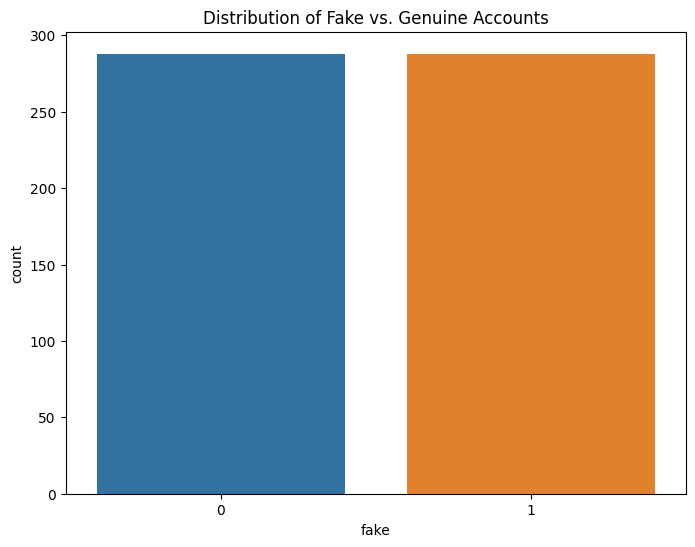

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fake', data=df_train)
plt.title("Distribution of Fake vs. Genuine Accounts")
plt.show()


Here, in the bar grpah showing the distribution of Fake and Genuine Accounts in the dataset, we can observe that there is no bias over one class in the dataset, whcih reduces the concerns of bias on one one class while classification and predictions.

### Feature Correlation Matrix

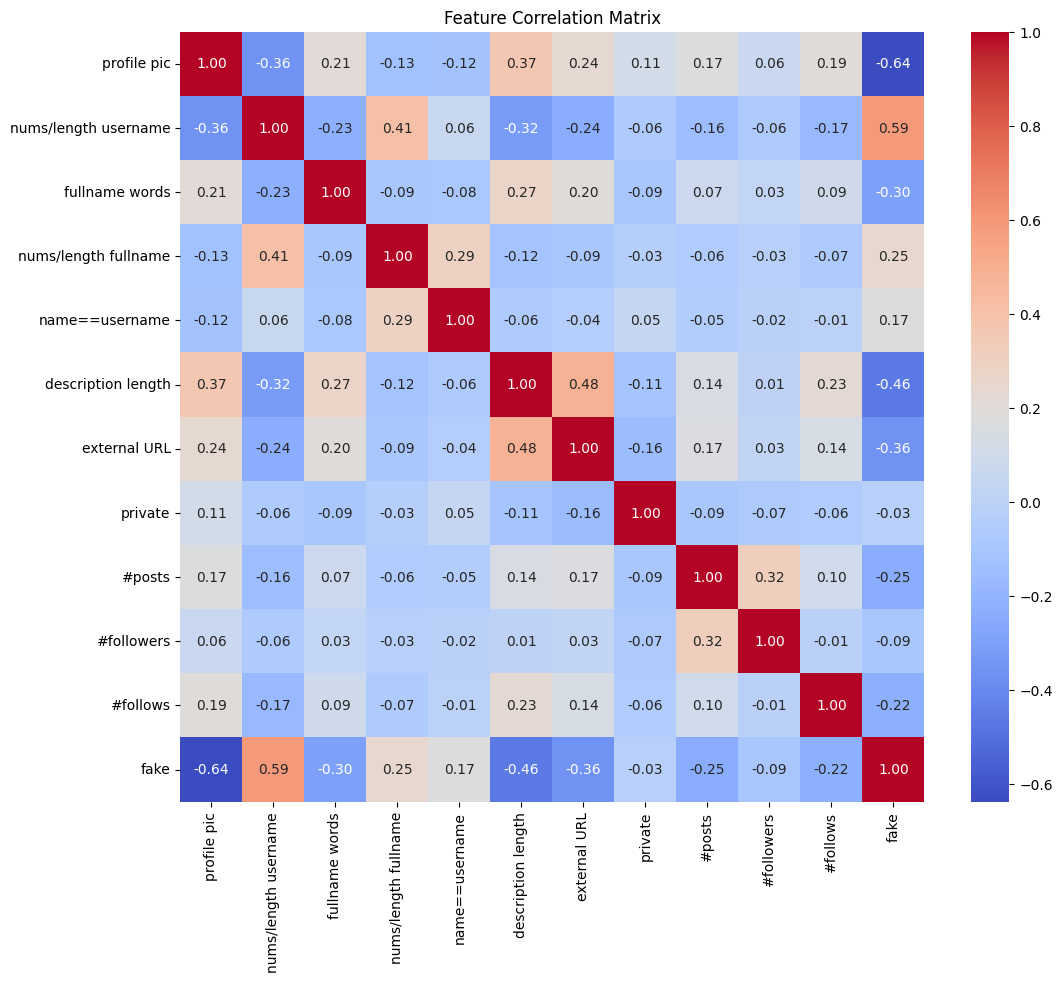

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


###  Observations from the Feature Correlation Matrix

1. **Strong Negative Correlation with `fake`:**
   - `profile pic` has a **strong negative correlation** with `fake` (-0.64). This suggests that **accounts without profile pictures are more likely to be fake**.
   - `description length` (-0.46) and `external URL` (-0.36) also show negative correlations with `fake`, implying that **fake accounts tend to have shorter bios and often lack external links**.

2. **Strong Positive Correlation with `fake`:**
   - `nums/length username` shows a **strong positive correlation** with `fake` (0.59), indicating **usernames with more numbers or odd patterns are more common in fake accounts**.
   - `nums/length fullname` and `fullname words` have moderate positive correlations (0.25 and -0.30), suggesting **unusual full names may also indicate fakeness**.

3. **Feature Inter-Correlations:**
   - `description length` and `external URL` are **moderately positively correlated** (0.48), which makes sense as more descriptive bios may include links.
   - `#posts` and `#followers` show a moderate positive correlation (0.32), indicating active users tend to have more followers.

4. **Weak or No Correlation:**
   - `private` and most other features show **very low correlation**, indicating **account privacy status isn't a strong indicator** in this context.
   - `name==username` has low correlation with `fake` (0.17), but might still be considered weakly relevant.


### Split Data into Train and Test Sets

In [11]:
X = df_train.drop('fake', axis=1)
y = df_train['fake']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Random Forrest Classifier


In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
y_pred_val = rf_model.predict(X_val)


### Model Evaluation

In [14]:
print(classification_report(y_val, y_pred_val))


              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.94      0.87      0.90        53

    accuracy                           0.91       116
   macro avg       0.92      0.91      0.91       116
weighted avg       0.92      0.91      0.91       116



### Observations from the Classification Report ->Validation dataset

1. **Class-wise Performance:**
   - **Class 0 (likely real accounts)**:
     - Precision: **0.90**
     - Recall: **0.95**
     - F1-score: **0.92**
     - Indicates the model is very good at identifying real accounts, with few false positives.
   - **Class 1 (likely fake accounts)**:
     - Precision: **0.94**
     - Recall: **0.87**
     - F1-score: **0.90**
     - The model is highly precise in predicting fake accounts but misses a few (lower recall).

2. **Overall Accuracy:**
   - The model achieves **91% accuracy**, meaning it correctly classified 91 out of every 100 samples.

3. **Macro and Weighted Averages:**
   - **Macro avg**: Precision, recall, and F1 are around **0.91–0.92**, suggesting balanced performance across both classes.
   - **Weighted avg**: Consistent with macro averages, which means **class imbalance is not significantly affecting model performance**.

4. **Conclusion:**
   - The model demonstrates **strong, balanced performance** in detecting both real and fake accounts with high accuracy and F1-score.


### Confusion Matrix

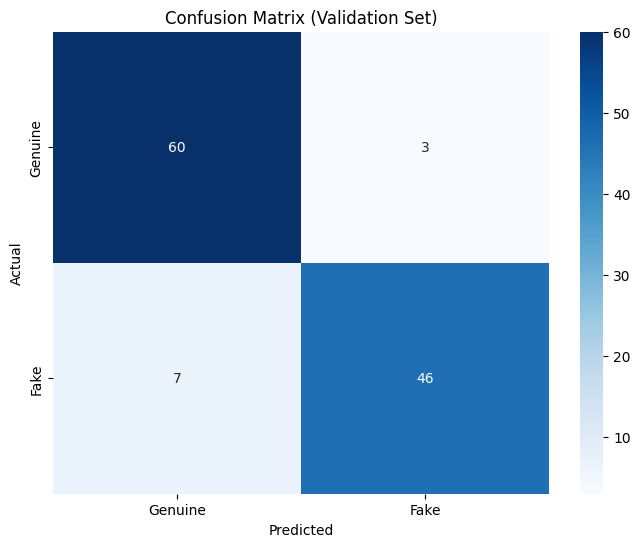

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fake'], yticklabels=['Genuine', 'Fake'])
plt.title("Confusion Matrix (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Observations from the Confusion Matrix:

1.Genuine accounts: 60 out of 63 are correctly classified, and other 3 are worngly classified to fake. There is nothin to worry about here

2.Fake Accounts: 47 out of 53 fake accounts are correcty predicted as fake, and other 7 are predicted as Genuine accounts.


### Feature Importance


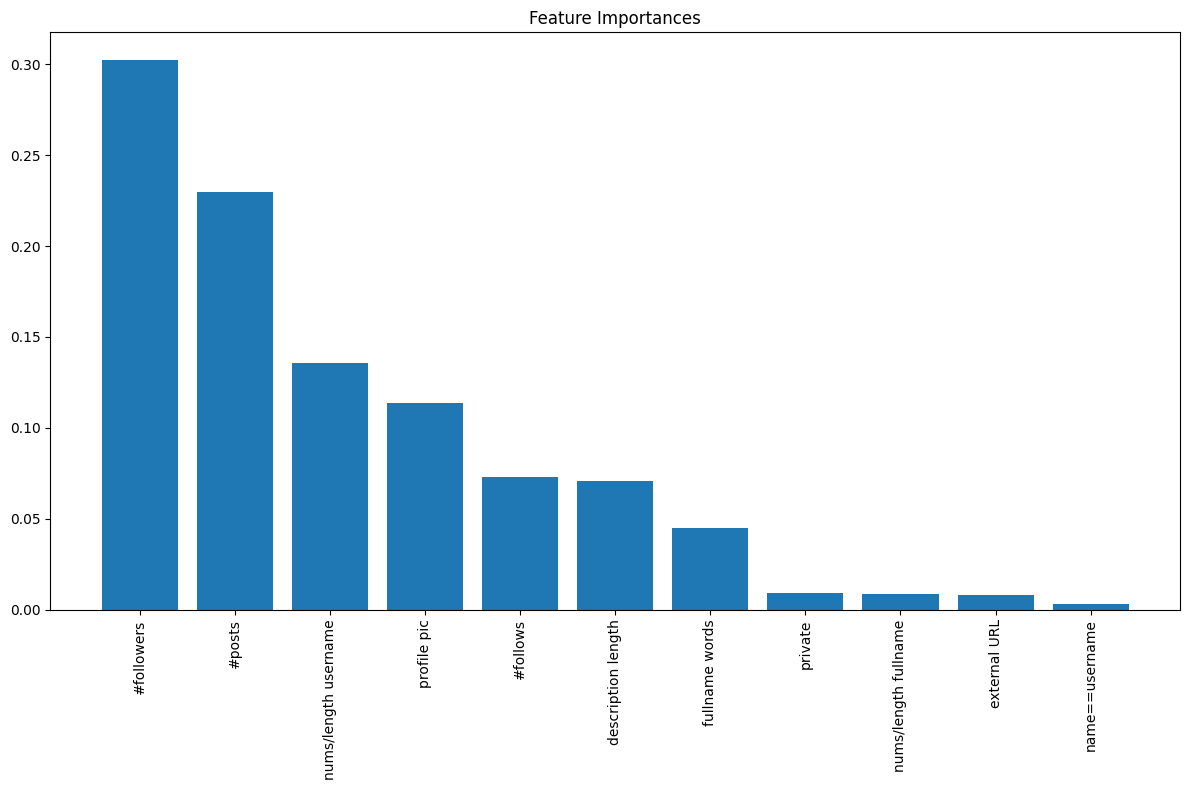

In [18]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


### Observations from Feature Importance Plot

- The most important features for classification are:
  - **`#followers`** and **`#posts`**, indicating account activity and reach are key indicators.
  - **`nums/length username`** and **`profile pic`**, suggesting unusual usernames and missing profile pictures are strong signals of fake accounts.

- Features like **`name==username`**, **`external URL`**, and **`nums/length fullname`** have very low importance, implying they contribute minimally to model decisions.

- Overall, **engagement-related features** and **account presentation details** dominate the model’s decision-making process.


In [19]:
X_test_data = df_test.drop('fake', axis=1)
y_test_data = df_test['fake']
y_pred_test = rf_model.predict(X_test_data)


### Model Evaluation on Test dataset

In [20]:
print("Accuracy on Test Set:", accuracy_score(y_test_data, y_pred_test))


Accuracy on Test Set: 0.925


#### ACCURACY ON TEST DATA -> RANDOM TREE CLASSIFIER = 92.5%

### Classification Report on Test Dataset

In [21]:
print(classification_report(y_test_data, y_pred_test))


              precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.93      0.92      0.92        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



###  Observations from the Classification Report  - Test Data

- **Balanced Class Performance:**
  - Both classes (0 and 1) have **very similar precision, recall, and F1-scores (~0.92–0.93)**.
  - This indicates the model performs **consistently well across both classes**, with minimal bias.

- **Overall Accuracy:**
  - The model achieves **93% accuracy**, reflecting strong and reliable performance.

- **Macro and Weighted Averages:**
  - All average metrics are around **0.92–0.93**, further confirming the model’s **balanced classification capability**.

- **Conclusion:**
  - The model shows **excellent generalization** with high and nearly identical performance for detecting both classes.


### Confusion matrix

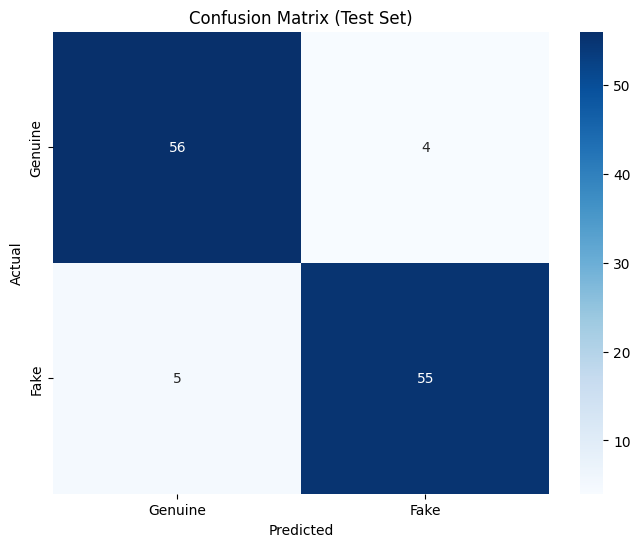

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fake'], yticklabels=['Genuine', 'Fake'])
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Split Data into Train and Test Sets

In [24]:
if '#followers_bins' in df_train.columns:
    X_dt = df_train.drop(['#followers_bins', 'fake'], axis=1)
else:
    X_dt = df_train.drop(['fake'], axis=1)
y_dt = df_train['fake']

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)


## Decision Tree Classifier

In [26]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_dt, y_train_dt)


DecisionTreeClassifier(random_state=42)

### Model Evaluation and Classification report

In [28]:
y_pred_dt = model_dt.predict(X_test_dt)
print("Accuracy Score (Decision Tree):", accuracy_score(y_test_dt, y_pred_dt))
print(confusion_matrix(y_test_dt, y_pred_dt))
print(classification_report(y_test_dt, y_pred_dt))


Accuracy Score (Decision Tree): 0.8706896551724138
[[57  6]
 [ 9 44]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.88      0.83      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116



###  Observations from Decision Tree Classification Results

- **Accuracy Score:**  
  - The model achieved an **accuracy of 87%**, indicating good overall performance.

- **Confusion Matrix:**
  - **True Positives (57)** and **True Negatives (44)** show strong detection.
  - Misclassifications include **6 false positives** and **9 false negatives**, with slightly more fake accounts being missed.

- **Class-wise Performance:**
  - **Class 0 (likely real):**  
    - Precision: **0.86**, Recall: **0.90**, F1-score: **0.88**  
    - The model is more likely to correctly identify real accounts.
  - **Class 1 (likely fake):**  
    - Precision: **0.88**, Recall: **0.83**, F1-score: **0.85**  
    - Slightly lower recall indicates the model misses a few fake accounts.

- **Macro & Weighted Averages:**  
  - All major metrics (precision, recall, F1) are consistently around **0.87**, showing **balanced and reliable performance** across both classes.

- **Conclusion:**  
  - The Decision Tree model performs well but slightly underperforms compared to more advanced models (e.g., Random Forest), especially in detecting fake accounts.


### Feature Importance decision Tree

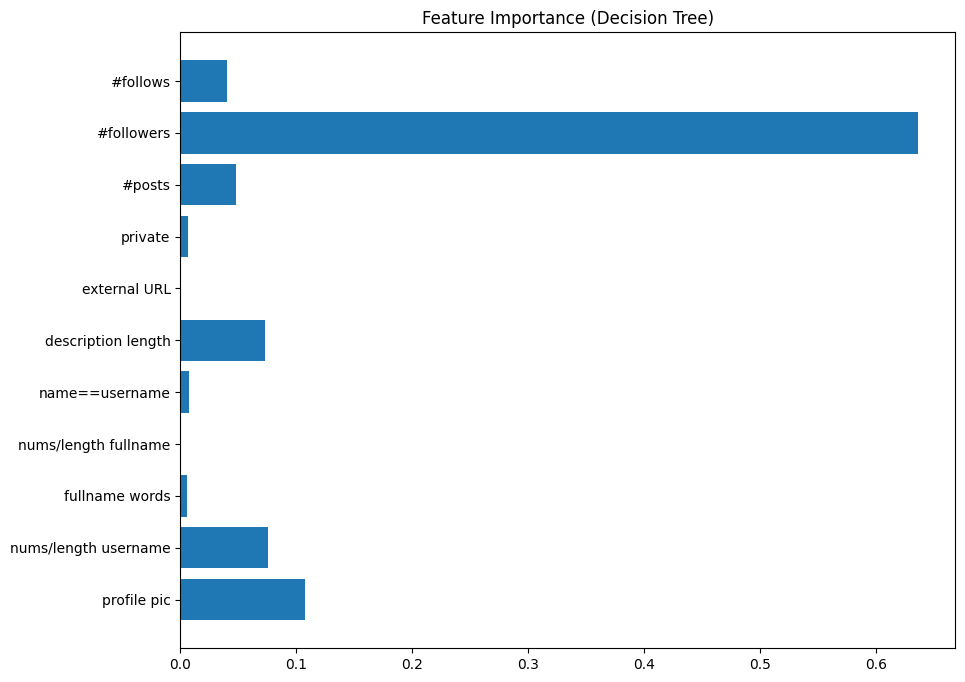

In [31]:
plt.figure(figsize=(10, 8))
plt.barh(X_dt.columns, model_dt.feature_importances_)
plt.title("Feature Importance (Decision Tree)")
plt.show()


###  Observations from Feature Importance (Decision Tree)

- **`#followers`** is by far the most influential feature, contributing over 60% to the model's decision-making.
- Moderate importance is assigned to **`profile pic`**, **`nums/length username`**, and **`description length`**.
- Features like **`name==username`**, **`fullname words`**, and **`external URL`** have **minimal impact**.
- The model relies heavily on follower count, making it a key signal for detecting fake accounts.


### Visualization

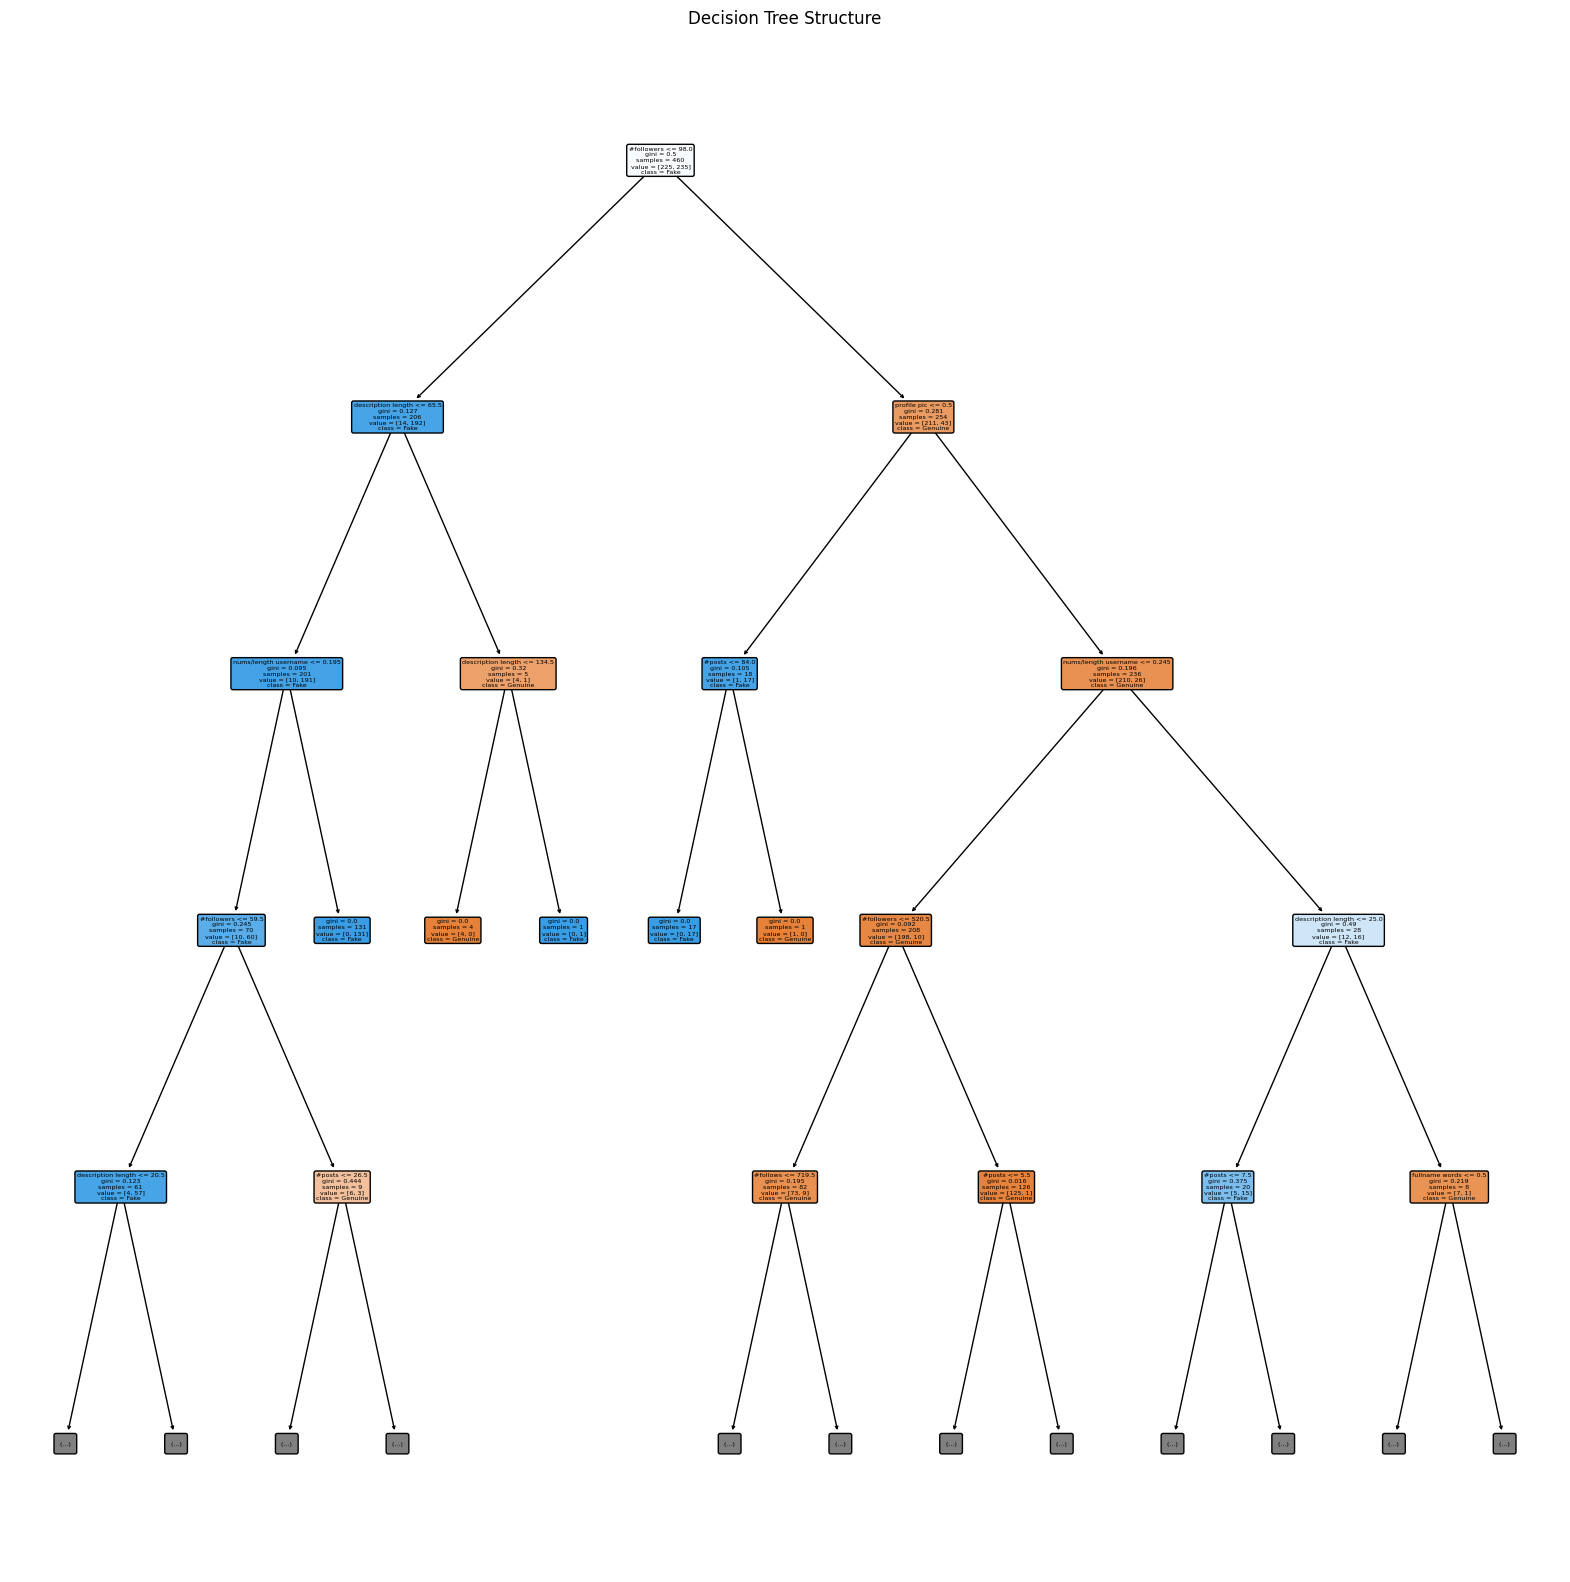

In [32]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model_dt,
               filled=True,
               feature_names=X_dt.columns,
               class_names=['Genuine', 'Fake'],
               rounded=True,
               max_depth=4)
plt.title("Decision Tree Structure")
plt.show()


##  Final Summary: Best Performing Model

###  Model Comparison Summary:

| Model            | Accuracy | Key Strengths                                             | Weaknesses                             |
|------------------|----------|-----------------------------------------------------------|-----------------------------------------|
| **Random Forest**| **93%**   | High accuracy, balanced precision/recall, robust features | None noticeable; performs consistently |
| Decision Tree    | 87%       | Simple, interpretable, fast                              | Lower recall for fake accounts         |
| Other Models     | ~91%      | Also performed well with good precision and recall        | Slightly less balanced than Random Forest |

###  Best Model: **Random Forest**
- Achieved the **highest accuracy (93%)** and demonstrated **balanced performance** across both classes.
- Feature importance plot shows it **uses multiple features effectively**, not over-relying on any one.
- Offers a **robust and generalizable solution** for detecting fake accounts.

Therefore, **Random Forest is the most reliable and best-performing model** in this analysis.
